In [1]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web
import matplotlib.pyplot as plt


In [2]:
doge = web.DataReader('MONA-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,3.039360,2.840420,2.855220,2.967630,4630550,2.967630
2017-11-10,2.993850,2.606440,2.959770,2.616590,3069090,2.616590
2017-11-11,2.714720,2.520320,2.627440,2.597220,3258960,2.597220
2017-11-12,3.109670,2.173080,2.598040,2.817210,9822060,2.817210
2017-11-13,3.254420,2.666150,2.795100,2.895720,9818930,2.895720
...,...,...,...,...,...,...
2022-05-11,0.745291,0.641406,0.727768,0.643084,391894,0.643084
2022-05-12,0.656063,0.560419,0.643348,0.639287,526501,0.639287
2022-05-13,0.708057,0.634488,0.638468,0.674481,407607,0.674481


In [3]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('lstmsamo.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

        High       Low      Open     Close   Volume  Adj Close  Polarity Score
0   0.040466  0.038822  0.039959  0.039110  4540382   0.039110        0.095867
1   0.021496  0.019967  0.021055  0.020416  2354228   0.020416        0.146020
2   0.021305  0.020069  0.021282  0.020087  3187547   0.020087        0.138143
3   0.025363  0.023064  0.024562  0.023468  8960013   0.023468        0.146417
4   0.014378  0.014238  0.014378  0.014256  3676427   0.014256        0.134860
..       ...       ...       ...       ...      ...        ...             ...
59  0.023269  0.022024  0.022421  0.022790  3532996   0.022790        0.114973
60  0.016646  0.015695  0.016506  0.015704  5824475   0.015704        0.131016
61  0.022805  0.021691  0.022789  0.022610  5609570   0.022610        0.107061
62  0.015841  0.014353  0.015703  0.014370  4648590   0.014370        0.141040
63  0.022841  0.021453  0.022609  0.021560  5378382   0.021560        0.083907

[64 rows x 7 columns]


In [4]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [5]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [6]:
n_train

49

In [7]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [8]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [9]:
X_test

array([[1.60910003e-02, 1.56830009e-02, 1.58719998e-02, 4.58019800e+06,
        1.58030000e-02, 1.48283467e-01],
       [2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
        2.02270001e-02, 1.31502325e-01],
       [2.25079991e-02, 1.84300002e-02, 1.84509996e-02, 7.97182800e+06,
        2.24239994e-02, 1.53586280e-01],
       [1.65059995e-02, 1.55039998e-02, 1.58009995e-02, 5.23944600e+06,
        1.65059995e-02, 1.28670540e-01],
       [2.32689995e-02, 2.20240001e-02, 2.24210005e-02, 3.53299600e+06,
        2.27899998e-02, 1.14973180e-01],
       [1.66459996e-02, 1.56950001e-02, 1.65059995e-02, 5.82447500e+06,
        1.57040004e-02, 1.31015680e-01],
       [2.28049997e-02, 2.16910001e-02, 2.27889996e-02, 5.60957000e+06,
        2.26099994e-02, 1.07060620e-01],
       [1.58409998e-02, 1.43529996e-02, 1.57030001e-02, 4.64859000e+06,
        1.43700000e-02, 1.41039940e-01]])

In [10]:
y_test

array([0.015803, 0.020227, 0.022424, 0.016506, 0.02279 , 0.015704,
       0.02261 , 0.01437 ])

In [11]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
# Load the TensorBoard notebook extension.
%load_ext tensorboard
from datetime import datetime


In [12]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [13]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(2, 5, 6) (2,)


In [14]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4992      
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=30,
                                        verbose=1,
                                        validation_data=val_data_gen, #training put a graph of traing loss and val loss
                                        callbacks=[tensorboard_callback])


C:\Users\moham\AppData\Local\Temp/ipykernel_17256/531576743.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


Epoch 1/30
10/10 [==============================] - 5s 160ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2/30
10/10 [==============================] - 1s 71ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 4.5114e-05 - val_mse: 4.5114e-05
Epoch 4/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 3.1003e-05 - val_mse: 3.1003e-05
Epoch 6/30
10/10 [==============================] - 0s 15ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 2.6491e-06 - val_mse: 2.6491e-06
Epoch 7/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 4.6920e-04 - val_mse: 4.6920e-04
Epoch 8/30
10/10 [==============================] 

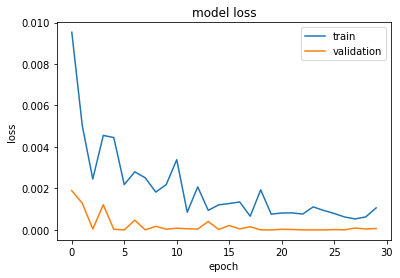

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
pred = model_lstm.predict(test_data_gen)

In [18]:
test_data_gen[0]

(array([[[1.60910003e-02, 1.56830009e-02, 1.58719998e-02, 4.58019800e+06,
          1.58030000e-02, 1.48283467e-01],
         [2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
          2.02270001e-02, 1.31502325e-01],
         [2.25079991e-02, 1.84300002e-02, 1.84509996e-02, 7.97182800e+06,
          2.24239994e-02, 1.53586280e-01],
         [1.65059995e-02, 1.55039998e-02, 1.58009995e-02, 5.23944600e+06,
          1.65059995e-02, 1.28670540e-01],
         [2.32689995e-02, 2.20240001e-02, 2.24210005e-02, 3.53299600e+06,
          2.27899998e-02, 1.14973180e-01]],
 
        [[2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
          2.02270001e-02, 1.31502325e-01],
         [2.25079991e-02, 1.84300002e-02, 1.84509996e-02, 7.97182800e+06,
          2.24239994e-02, 1.53586280e-01],
         [1.65059995e-02, 1.55039998e-02, 1.58009995e-02, 5.23944600e+06,
          1.65059995e-02, 1.28670540e-01],
         [2.32689995e-02, 2.20240001e-02, 2.24210005e-02, 3.5

In [19]:
pred

array([[0.02660668],
       [0.02660668],
       [0.02660668]], dtype=float32)

In [20]:
import matplotlib.pyplot as plt

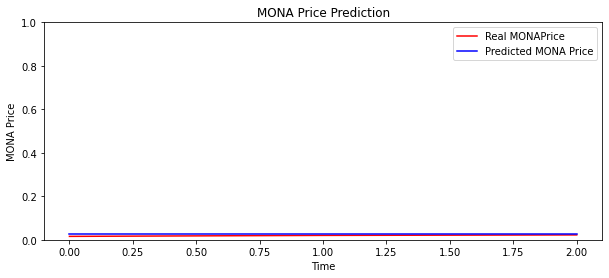

In [21]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real MONAPrice')
plt.plot(pred, color = 'blue', label = 'Predicted MONA Price')
plt.title('MONA Price Prediction')
plt.xlabel('Time')
plt.ylabel('MONA Price')
plt.ylim(0,1)
plt.legend()
plt.show()

In [22]:
# on cmd promt, you should use the function below to kill the tensorboard 
#taskkill /im tensorboard.exe /f
#del /q %TMP%\.tensorboard-info\*#

In [23]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 2592), started 1 day, 6:31:51 ago. (Use '!kill 2592' to kill it.)